## Image Defect Detection of CNN

In [1]:
# Import Image Package
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## Loading Image Dataset

In [2]:
_URL = '/home/yukun/python/Tensorflow2.0_tutorial/Coating Image/'

PATH = os.path.join(os.path.dirname(_URL), 'Img_defect_dataset')
print(PATH)

/home/yukun/python/Tensorflow2.0_tutorial/Coating Image/Img_defect_dataset


In [3]:
# The dataset has the following directory structure
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print(train_dir)
print(validation_dir)

/home/yukun/python/Tensorflow2.0_tutorial/Coating Image/Img_defect_dataset/train
/home/yukun/python/Tensorflow2.0_tutorial/Coating Image/Img_defect_dataset/validation


In [4]:
# train_air_dir = os.path.join(train_dir, 'air')  # directory with our training air pictures
train_riv_dir = os.path.join(train_dir, 'rivulet')  # directory with our training air pictures
train_non_dir = os.path.join(train_dir, 'non')  # directory with our training non pictures
# validation_air_dir = os.path.join(validation_dir, 'air')  # directory with our validation air pictures
validation_riv_dir = os.path.join(validation_dir, 'rivulet')  # directory with our validation air pictures
validation_non_dir = os.path.join(validation_dir, 'non')  # directory with our validation non pictures

## Understand the data

In [7]:
# Let's look at how many cats and dogs images are in the training and validation directory:
# num_air_tr = len(os.listdir(train_air_dir))
num_riv_tr = len(os.listdir(train_riv_dir))
num_non_tr = len(os.listdir(train_non_dir))

# num_air_val = len(os.listdir(validation_air_dir))
num_riv_val = len(os.listdir(validation_riv_dir))
num_non_val = len(os.listdir(validation_non_dir))

In [23]:
# total_train = num_air_tr + num_non_tr 
# total_val = num_air_val + num_non_val 
total_train = num_riv_tr + num_non_tr 
total_val = num_riv_val + num_non_val 

print('total training air images:', num_riv_tr)
print('total training non images:', num_non_tr)
print("--")
print('total validation air images:', num_riv_val)
print('total validation non images:', num_non_val)
print("--")
print("Total training images:  ", total_train)
print("Total validation images:", total_val)

total training air images: 160
total training non images: 201
--
total validation air images: 50
total validation non images: 50
--
Total training images:   361
Total validation images: 100


In [9]:
# For convenience, set up variables to use while pre-processing the dataset and training the network.
batch_size = 30
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224
# IMG_HEIGHT = 512
# IMG_WIDTH = 512

## Data preparation

In [24]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [25]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 361 images belonging to 2 classes.


In [26]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=5,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 100 images belonging to 2 classes.


In [27]:
# Image shape
print('batch size of train_data_gen  :', train_data_gen.batch_size)
print('image shape of train_data_gen :', train_data_gen.image_shape)
print('batch size of val_data_gen    :', val_data_gen.batch_size)
print('image shape of val_data_gen   :', val_data_gen.image_shape)

batch size of train_data_gen  : 30
image shape of train_data_gen : (224, 224, 3)
batch size of val_data_gen    : 5
image shape of val_data_gen   : (224, 224, 3)


## Visualize training images

In [28]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [29]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

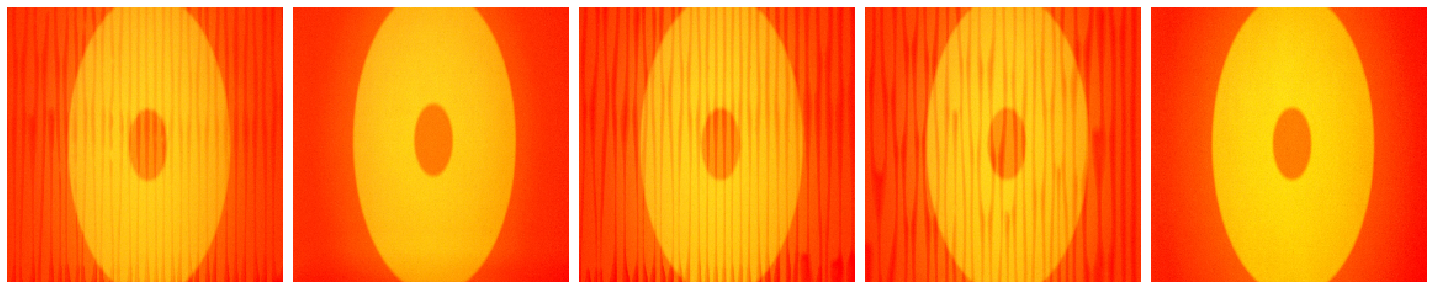

[1. 0. 1. 1. 0.]


In [30]:
plotImages(sample_training_images[:5])
print(sample_training_labels[:5])

## Creat the CNN model

In [31]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

## Train the model

In [34]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
12/12 [==============================] - 3s 216ms/step - loss: 1.4025 - accuracy: 0.4864 - val_loss: 0.7536 - val_accuracy: 0.4000
Epoch 2/10
12/12 [==============================] - 2s 181ms/step - loss: 0.6973 - accuracy: 0.6314 - val_loss: 0.6809 - val_accuracy: 0.4000
Epoch 3/10
12/12 [==============================] - 2s 197ms/step - loss: 0.5369 - accuracy: 0.7583 - val_loss: 0.3484 - val_accuracy: 0.9333
Epoch 4/10
12/12 [==============================] - 2s 171ms/step - loss: 0.3561 - accuracy: 0.7748 - val_loss: 0.5848 - val_accuracy: 0.4667
Epoch 5/10
12/12 [==============================] - 2s 188ms/step - loss: 0.1713 - accuracy: 0.9517 - val_loss: 0.1762 - val_accuracy: 0.9333
Epoch 6/10
12/12 [==============================] - 2s 206ms/step - loss: 0.1296 - accuracy: 0.9556 - val_loss: 0.0946 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 2s

## Visualize training results

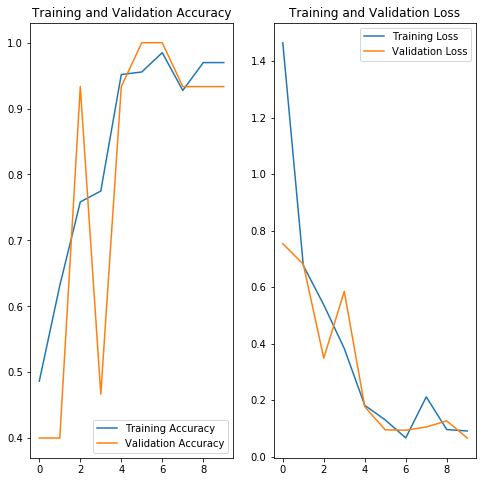

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Put it all together

In [20]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [21]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 602 images belonging to 2 classes.


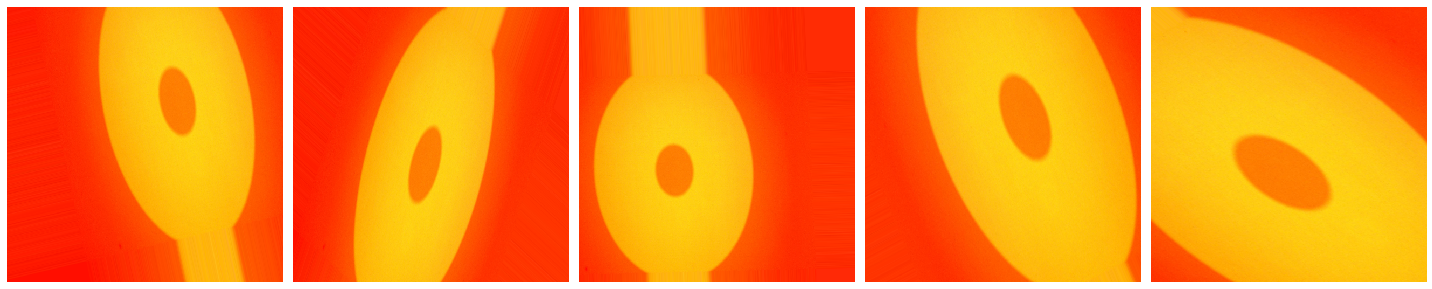

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [24]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 100 images belonging to 2 classes.


In [25]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
#     Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
#     Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)           

In [27]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
20/20 [==============================] - 21s 1s/step - loss: 4.7004 - accuracy: 0.6521 - val_loss: 7.8839 - val_accuracy: 0.4889
Epoch 2/10
20/20 [==============================] - 20s 1s/step - loss: 5.2387 - accuracy: 0.6678 - val_loss: 7.8839 - val_accuracy: 0.4889
Epoch 3/10
20/20 [==============================] - 20s 1s/step - loss: 5.3418 - accuracy: 0.6608 - val_loss: 7.8839 - val_accuracy: 0.4889
Epoch 4/10
20/20 [==============================] - 20s 1s/step - loss: 4.8186 - accuracy: 0.6731 - val_loss: 7.8839 - val_accuracy: 0.4889
Epoch 5/10
20/20 [==============================] - 20s 1s/step - loss: 4.8186 - accuracy: 0.6731 - val_loss: 7.8839 - val_accuracy: 0.4889
Epoch 6/10
20/20 [==============================] - 20s 1s/step - loss: 5.2130 - accuracy: 0.6696 - val_loss: 7.8839 - val_accuracy: 0.4889
Epoch 7/10
20/20 [==============================] - 20s 1s/step - loss: 5.3340 - accuracy: 0.6381 - val_loss: 7.8839 - val_accuracy: 0.4889
Epoch 8/10
20/20 [==

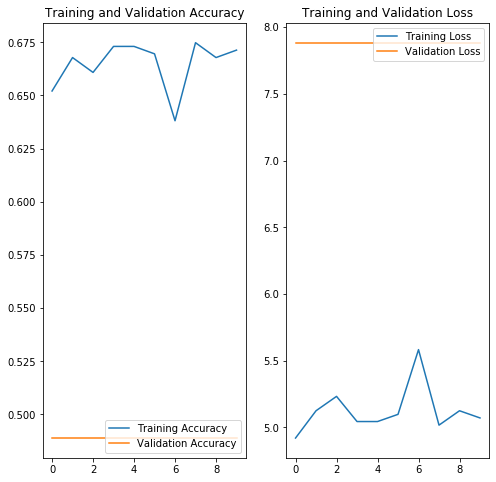

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()